In [36]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import utils

In [3]:
batch = '2024_02_06_Batch_8'
pipeline = 'profiles_tcdropped_filtered_var_mad_outlier_featselect'

In [4]:
result_dir = f"../6.downstream_analysis_snakmake/outputs/results/{batch}/{pipeline}"
ppi_path = '../abundance_ppi_his3_edgotyping.tsv'

In [68]:
df_result = pd.read_csv(f'{result_dir}/result.csv')
df_ppi = pd.read_csv(ppi_path, sep='\t', header=0)
df_threshold = pd.read_csv("outputs/data/thresholds.csv")

In [71]:
thresh = df_threshold[df_threshold['Batch_ID']==batch]['threshold'].item()
protein_thresh = df_threshold[df_threshold['Batch_ID']==batch]['score_thresh_protein'].item()
non_protein_thresh = df_threshold[df_threshold['Batch_ID']==batch]['score_thresh_protein'].item()

In [26]:
df_result['Group2'] = df_result['Group2'].apply(lambda x: x.split('_')[-1])

In [27]:
score_col = 'PR_AUC'
df_protein_ctrl, df_protein_var, df_non_protein_ctrl, df_non_protein_var = utils.split_result_dataframes(
    df_result, score_col=score_col)
df_protein_ctrl, df_protein_var, df_non_protein_ctrl, df_non_protein_var = utils.take_median(
    df_protein_ctrl, df_protein_var, df_non_protein_ctrl, df_non_protein_var
)

Dropped 0 NaN rows for PR_AUC column.


In [29]:
# Merge with ClinVar Annotation
df_protein_var = df_protein_var.merge(
    df_ppi[['symbol', 'aa_change', 'clinical_significance', 'z_abundance_change']], 
    how='left', 
    left_on=['Group1', 'Group2'],
    right_on=['symbol', 'aa_change'],
    )
df_non_protein_var = df_non_protein_var.merge(
    df_ppi[['symbol', 'aa_change', 'clinical_significance', 'z_abundance_change']], 
    how='left', 
    left_on=['Group1', 'Group2'],
    right_on=['symbol', 'aa_change'],
    )

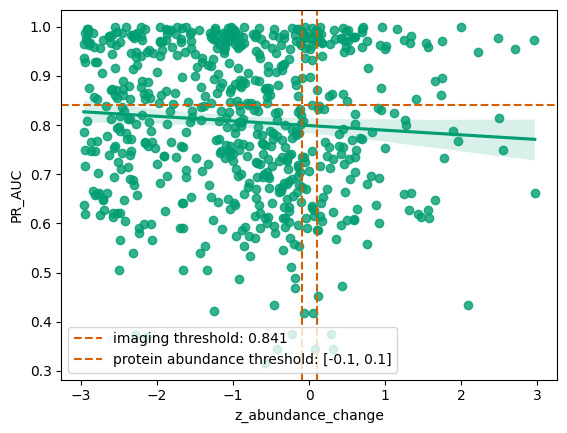

In [82]:
# Plot with protein abundance change
df_protein_filtered = df_protein_var[(-3<df_protein_var['z_abundance_change']) & (df_protein_var['z_abundance_change']<3)]
cmap = sb.color_palette("colorblind")
g = sb.regplot(
    data=df_protein_filtered,
    x="z_abundance_change", 
    y="PR_AUC",
    # kind="scatter",
    # hue='clinical_significance',
    color=cmap[2]
)
# plt.xlim(-3, 3)
# plt.ylim(0, 1)
# g.plot_joint(sns.kdeplot, color=cmap[1])
plt.axhline(protein_thresh, color=cmap[3], linestyle='--', label=f'imaging threshold: {"{:.3f}".format(protein_thresh)}')
plt.axvline(-0.1, color=cmap[3], linestyle='--', label=f'protein abundance threshold: [{"{:.1f}".format(-0.1)}, {"{:.1f}".format(0.1)}]')
plt.axvline(0.1, color=cmap[3], linestyle='--')

plt.legend(loc=3)

In [89]:
df_protein_var[(df_protein_var['z_abundance_change']<-2.5) & (df_protein_var['PR_AUC']<0.841)].sort_values('PR_AUC').reset_index()

,index,Group1,Group2,PR_AUC,Metadata_Control,symbol,aa_change,clinical_significance,z_abundance_change
0,912,STXBP1,Arg292Cys,0.505123,False,STXBP1,Arg292Cys,Pathogenic,-2.505625
1,914,STXBP1,Arg406Cys,0.612514,False,STXBP1,Arg406Cys,Pathogenic,-2.577541
2,737,PKP2,Ser227Arg,0.616949,False,PKP2,Ser227Arg,VUS,-2.749863
3,306,GCK,Arg303Trp,0.618264,False,GCK,Arg303Trp,Pathogenic,-2.947698
4,938,STXBP1,Pro480Leu,0.621604,False,STXBP1,Pro480Leu,Pathogenic,-2.575726
5,915,STXBP1,Arg406His,0.621764,False,STXBP1,Arg406His,Pathogenic,-2.533078
6,366,HBD,Arg117His,0.627764,False,HBD,Arg117His,other,-2.698578
7,300,GAMT,Asp219Asn,0.636928,False,GAMT,Asp219Asn,VUS,-2.959339
8,932,STXBP1,Leu426Pro,0.648371,False,STXBP1,Leu426Pro,Pathogenic,-2.708772
9,926,STXBP1,Gly544Asp,0.649529,False,STXBP1,Gly544Asp,Pathogenic,-2.714434


In [90]:
df_protein_var[(-0.1<df_protein_var['z_abundance_change']) & (df_protein_var['z_abundance_change']<0.1)].sort_values('PR_AUC').reset_index()

,index,Group1,Group2,PR_AUC,Metadata_Control,symbol,aa_change,clinical_significance,z_abundance_change
0,723,PKP2,Ile487Ser,0.345238,False,PKP2,Ile487Ser,Benign,0.073945
1,55,AGXT,Ile340Met,0.418872,False,AGXT,Ile340Met,Benign,-0.070397
2,56,AGXT,Ile340Met,0.418872,False,AGXT,Ile340Met,Benign,0.049480
3,83,ALAS2,Phe128Leu,0.589934,False,ALAS2,Phe128Leu,NaN,-0.032744
4,647,NCF2,Asn448Asp,0.611050,False,NCF2,Asn448Asp,Benign,-0.043116
5,145,COMP,His441Arg,0.615203,False,COMP,His441Arg,Pathogenic,0.069698
6,853,SH3BP2,Pro418His,0.627222,False,SH3BP2,Pro418His,Pathogenic,0.069126
7,967,TH,Glu27Asp,0.631511,False,TH,Glu27Asp,Conflicting,0.039216
8,625,MVK,Pro200Ser,0.636033,False,MVK,Pro200Ser,VUS,0.035510
9,161,CRYAB,Gly154Ser,0.670129,False,CRYAB,Gly154Ser,Conflicting,-0.039764
